# 사전 준비

## 구글 드라이브 마운트

1) 왼쪽의 다섯 개 아이콘 중, 네 번째 아이콘(폴더 모양 아이콘) 클릭해,

2) 파일 아래의 Google Drive 아이콘(세 번째 아이콘) 클릭하여, Google Drive를 마운트합니다.

In [ ]:
import os
base_gdrive_path = 'drive/MyDrive/lecture_220718'

# base_gdrive_path = os.path.join|('drive', 'MyDrive', 'lecture_220718')

In [ ]:
from pathlib import Path

result_path = os.path.join(base_gdrive_path, "results")
Path(result_path).mkdir(parents=True, exist_ok=True)

# Imports

In [ ]:
# TensorFlow 및 tf.keras
import tensorflow as tf
from tensorflow import keras

# 도움 라이브러리
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


# Fashion MNIST

## 데이터 다운 및 분석

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print("트레이닝 이미지 shape: {}, dtype: {}".format(train_images.shape, train_images.dtype))
print("트레이닝 라벨 shape: {}, dtype: {}".format(train_labels.shape, train_labels.dtype))

트레이닝 이미지 shape: (60000, 28, 28), dtype: uint8
트레이닝 라벨 shape: (60000,), dtype: uint8


In [ ]:
print("테스트 이미지 shape: {}, dtype: {}".format(test_images.shape, test_images.dtype))
print("테스트 라벨 shape: {}, dtype: {}".format(test_labels.shape, test_labels.dtype))

테스트 이미지 shape: (10000, 28, 28), dtype: uint8
테스트 라벨 shape: (10000,), dtype: uint8


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 전처리

샘플 데이터 하나 살펴보기

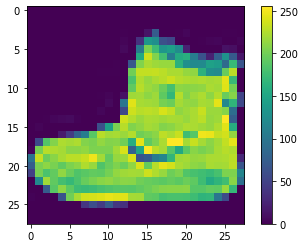

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

데이터를 비율로 변경. 트레이닝을 더 잘 시키기 위함

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

binary cmap으로 트레이닝 이미지 여러 개 살펴보기

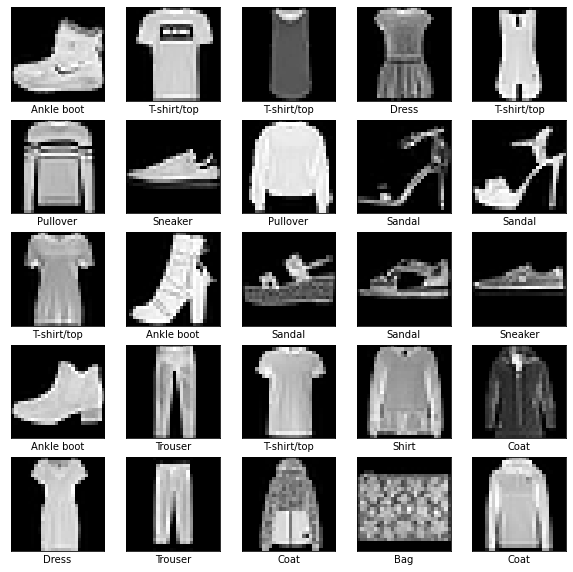

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary.reversed())
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델

### 모델 생성

In [ ]:
def model_1(input_shape=(28, 28)):
  input = keras.layers.Input((28, 28))
  flatten = keras.layers.Flatten()(input)
  dense_1 = keras.layers.Dense(128, activation=keras.activations.relu)(flatten)
  dense_2 = keras.layers.Dense(10)(dense_1)
  softmax_1 = keras.layers.Softmax()(dense_2)

  return keras.models.Model(inputs=[input], outputs=[softmax_1])

In [ ]:
model = model_1()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 트레이닝

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4993 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3732 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3363 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3115 - accuracy: 0.8873
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2949 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2785 - accuracy: 0.8975
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2577 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2456 - accuracy: 0.9094
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

### 모델 예측

In [33]:
predictions = model.predict(test_images)

In [34]:
predictions[0]

array([2.9144614e-06, 7.0765629e-11, 1.4887406e-09, 6.5935857e-09,
       6.4802435e-08, 4.5290748e-03, 9.2965053e-07, 1.1157255e-02,
       2.2528148e-08, 9.8430979e-01], dtype=float32)

In [35]:
np.argmax(predictions[0])

9

In [36]:
test_labels[0]

9

### 모델 예측 그리기

In [37]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [38]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

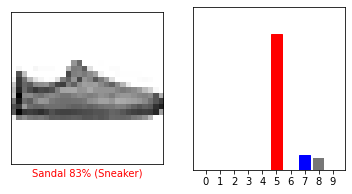

In [39]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [40]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# 모델 저장, 가중치 저장 및 불러오기

In [41]:
def save_model(model_name: str, model: keras.models.Model):
    model_json = model.to_json()
    with open(model_name, "w") as json_file:
        json_file.write(model_json)

In [42]:
from keras.models import model_from_json
from typing import Optional

def load_model(model_name: str, with_weights_path: Optional[str] = None) -> keras.models.Model:
    json_file = open(model_name, "r")
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    if with_weights_path:
        model.load_weights(with_weights_path)
    return model

In [43]:
import os
result_path = os.path.join(base_gdrive_path, "results")

In [44]:
save_model(os.path.join(result_path, "model_000.json"), model)

In [45]:
model.save_weights(os.path.join(result_path, "model_000__saved_weights.hdf5"))

In [46]:
loaded_model = load_model(os.path.join(result_path, "model_000.json"))
prediction_loaded_model = loaded_model.predict(test_images)

print("트레이닝한 모델의 예측: {}".format(np.argmax(predictions[0])))
print(predictions[0])
print("불러온 모델의 예측: {}".format(np.argmax(prediction_loaded_model[0])))
print(prediction_loaded_model[0])
print("정답 :{}".format(test_labels[0]))

트레이닝한 모델의 예측: 9
[2.9144614e-06 7.0765629e-11 1.4887406e-09 6.5935857e-09 6.4802435e-08
 4.5290748e-03 9.2965053e-07 1.1157255e-02 2.2528148e-08 9.8430979e-01]
불러온 모델의 예측: 4
[0.09711029 0.05845423 0.11799934 0.11747069 0.16956982 0.13453214
 0.06393571 0.08854618 0.10936555 0.04301605]
정답 :9


In [47]:
json_model_path = os.path.join(result_path, "model_000.json")
model_weight_path = os.path.join(result_path, "model_000__saved_weights.hdf5")
loaded_model_with_weight = load_model(json_model_path, model_weight_path)
prediction_loaded_model_with_weight = loaded_model_with_weight.predict(test_images)

print("트레이닝한 모델의 예측: {}".format(np.argmax(predictions[0])))
print(predictions[0])
print("가중치와 함께 불러온 모델의 예측: {}".format(np.argmax(prediction_loaded_model_with_weight[0])))
print(prediction_loaded_model_with_weight[0])
print("정답 :{}".format(test_labels[0]))

트레이닝한 모델의 예측: 9
[2.9144614e-06 7.0765629e-11 1.4887406e-09 6.5935857e-09 6.4802435e-08
 4.5290748e-03 9.2965053e-07 1.1157255e-02 2.2528148e-08 9.8430979e-01]
가중치와 함께 불러온 모델의 예측: 9
[2.9144614e-06 7.0765629e-11 1.4887406e-09 6.5935857e-09 6.4802435e-08
 4.5290748e-03 9.2965053e-07 1.1157255e-02 2.2528148e-08 9.8430979e-01]
정답 :9
